<a href="https://colab.research.google.com/github/Hamid-Mofidi/PINNs_on_Multiple_timescale_dynamics/blob/main/Examples/Example1_2x2exact_sol_odeint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solving a 2x2 system numerically (Comparing ODEint with the exact solution to obtain the error).

$$
\begin{aligned}
\frac{dx}{dt} =& \mu  (- x + y^2),\\
\frac{dy}{dt} =& - 2  y,
\end{aligned}
$$
where $\mu$ is a large number.


In another code, I have the errors obtained by PINNs. I want to have a separate code with errors to compare the errors obtained by odeint with the errors obtained by PINNs in above to see which one works better.




In [2]:
import numpy as np
from scipy.integrate import odeint

# Define the ODE system
def NewSystem(y, t, mu):
    x, y = y
    dxdt = mu * (- x + y**2)
    dydt = - 2 * y
    return [dxdt, dydt]

# Define the exact solution
def ExactSolution(t, mu, x0, y0):
    x_real = (mu * y0**2 / (-4 + mu)) * (np.exp(-4 * t) - np.exp(-mu * t)) + x0 * np.exp(-mu * t)
    y_real = y0 * np.exp(-2 * t)
    return x_real, y_real

# Initial conditions
x0 = 0
y0 = 1
t = np.linspace(0, 5, 100)
mu = 100

# Exact solution
x_exact, y_exact = ExactSolution(t, mu, x0, y0)

# Solve the ODE numerically using odeint
y0_numerical = [x0, y0]
solution_numerical = odeint(NewSystem, y0_numerical, t, args=(mu,))
x_numerical, y_numerical = solution_numerical.T

# Calculate errors
error_x = np.abs(x_exact - x_numerical)
error_y = np.abs(y_exact - y_numerical)

# Print errors
print("Maximum error in x:", np.max(error_x))
print("Maximum error in y:", np.max(error_y))


Maximum error in x: 1.2077596149357215e-08
Maximum error in y: 4.512533852748385e-08


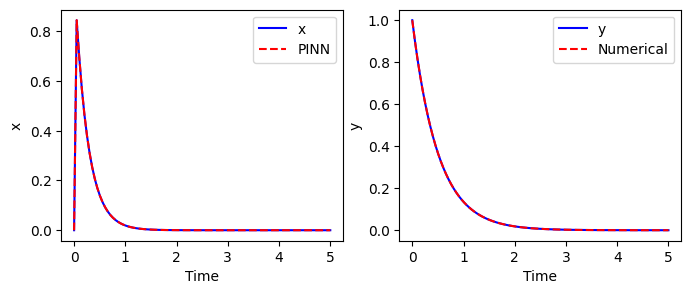

In [3]:
  import matplotlib.pyplot as plt

  plt.figure(figsize=(8, 3))
  plt.subplot(1, 2, 1)
  plt.plot(t, x_exact, 'b-', label='x')
  plt.plot(t, x_exact, 'r--', label='PINN')
  plt.xlabel('Time')
  plt.ylabel('x')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(t, y_numerical, 'b-', label='y')
  plt.plot(t, y_numerical, 'r--', label='Numerical')
  plt.xlabel('Time')
  plt.ylabel('y')
  plt.legend()
  plt.show()


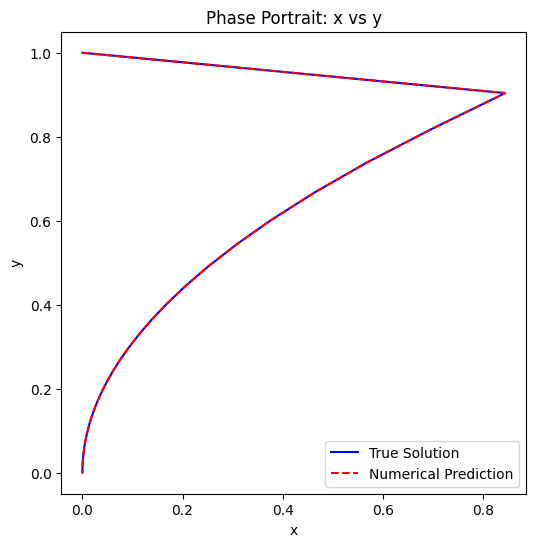

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.plot(x_exact, y_exact, 'b-', label='True Solution')
plt.plot(x_numerical, y_numerical, 'r--', label='Numerical Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait: x vs y')
plt.legend()
plt.show()